In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# importing the dataset
df = pd.read_csv('../data/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
cols = df.columns.to_list()

In [8]:
cols

['TV', 'Radio', 'Newspaper', 'Sales']

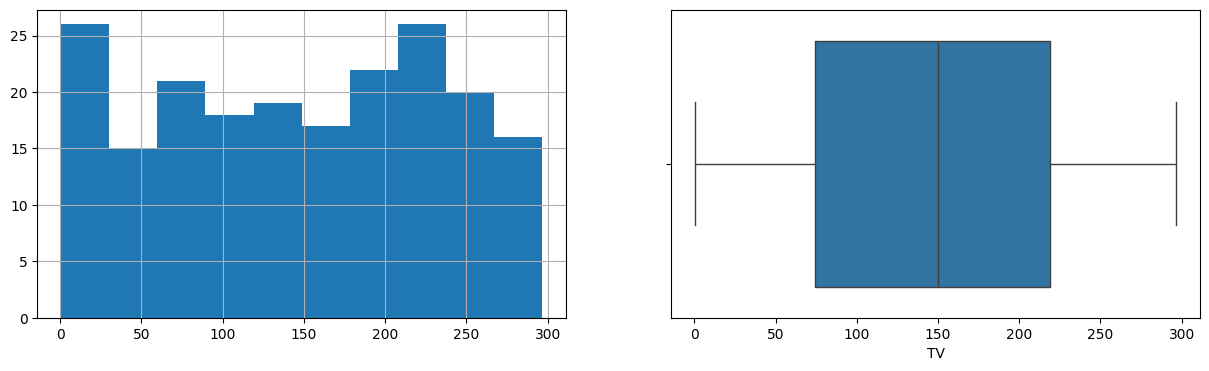

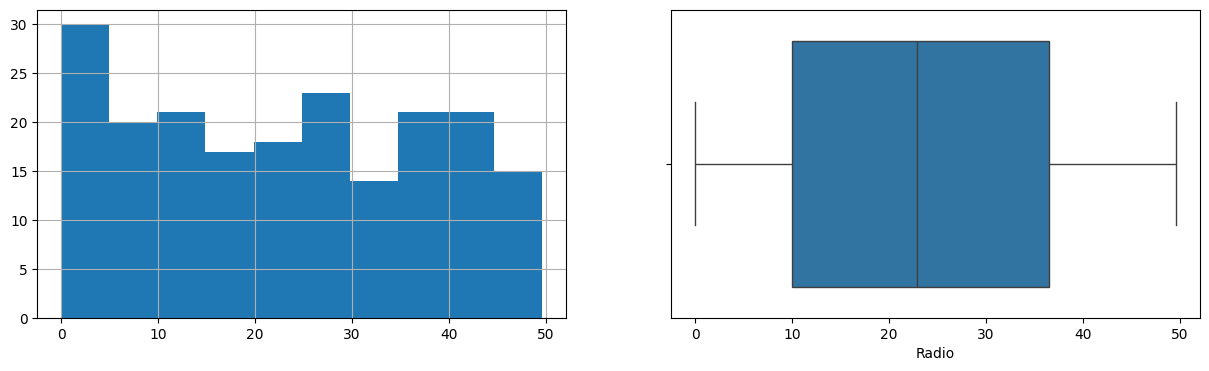

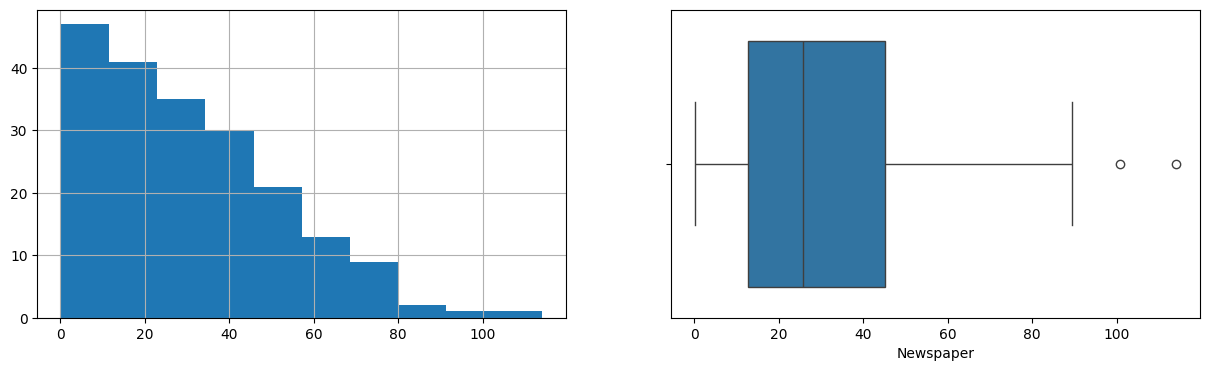

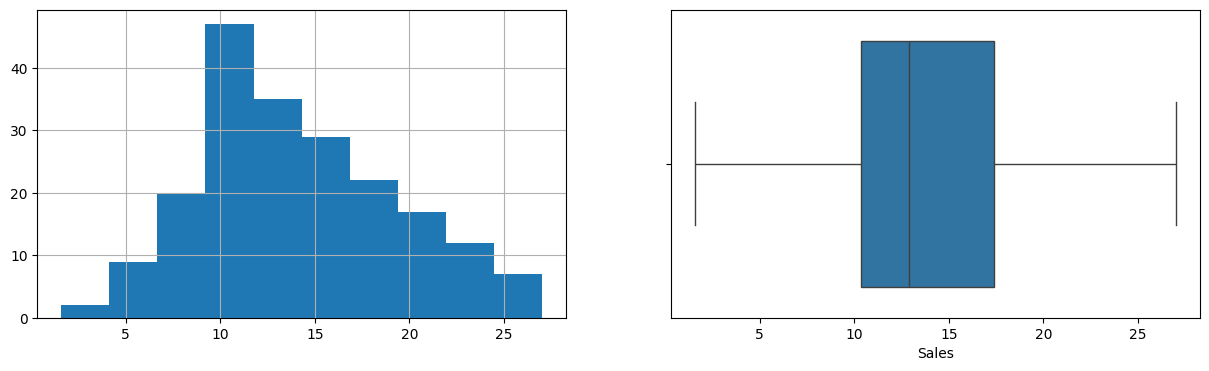

In [9]:
# univariate analysis

for col in cols:
    plt.figure(figsize= (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist()
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col])
    plt.show()

In [10]:
import plotly.express as px

for col in cols:
    hist_fig = px.histogram(df, x = col, title = f'Histogram of {col}', marginal = 'box')
    hist_fig.update_layout(height = 400, width = 600)
    hist_fig.show()

In [11]:
# define features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [12]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
# Evaluate the model using Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [14]:
# evaluate the model using metrics like R2, MSE, MAE

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Mean Squared Error: {mse_linear}')
print(f'R2 Score: {r2_linear}')

Mean Squared Error: 3.174097353976104
R2 Score: 0.899438024100912


In [15]:
# Evaluate the model using Polynomial Regression

# define the degree of polynomial
degree = 3

In [16]:
# transform features into polynomial features
poly = PolynomialFeatures(degree = degree)
X_poly_train = poly.fit_transform(X_train) # transform the training data
X_poly_test = poly.transform(X_test) # transform the testing data into polynomial equation of degree = 3

In [17]:
# build the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [18]:
# predict on the test data using polynomial model
y_pred_poly = poly_model.predict(X_poly_test)
y_pred_poly

array([17.11248517, 22.22545794, 21.48013597,  7.29194307, 24.25090325,
       13.12825544, 22.53973754,  8.60518861, 11.62323942, 15.52703964,
        7.67875377,  8.54547414, 12.15521933,  5.17285299, 10.50193485,
       12.095227  ,  6.40526398, 16.36097536, 11.22732048, 18.76103561,
       19.60776214, 11.62897333,  9.493112  , 21.78376471,  9.25708004,
        7.977186  , 22.1031492 , 12.81249392, 10.66311519,  5.21580322,
       11.21971089, 10.71494125, 22.71964779,  8.46157422, 16.18971107,
       20.84235212, 10.92054069, 20.73439222, 12.13257855,  6.43508762])

In [19]:
# evaluate the model using metrics like R2, MSE, MAE
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error: {mse_poly}')
print(f'R2 Score: {r2_poly}')

Mean Squared Error: 0.2945684090827446
R2 Score: 0.9906674629189604


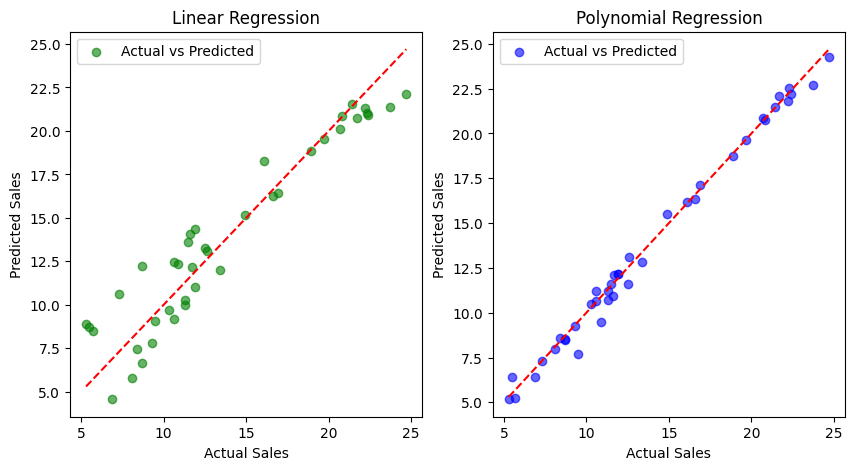

In [20]:
# Compare actual vs predicted values for both models

plt.figure(figsize= (10, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color = 'green', label = 'Actual vs Predicted', alpha=0.6)
plt.plot ([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression')
plt.legend()

# Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color = 'blue', label = 'Actual vs Predicted', alpha=0.6)
plt.plot ([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Polynomial Regression')
plt.legend()



In [21]:
# To find the best degree of polynomial

# create a polynomial regression with degree loop

mse_list = []
r2_list = []
degrees = range(2, 6) # range of degrees from 2 to 5

In [22]:
for degree in degrees:
    # transform features into polynomial features
    poly = PolynomialFeatures(degree = degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # build the polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)

    # predict on the test data using polynomial model
    y_pred_poly = poly_model.predict(X_poly_test)

    # evaluate the model using metrics like R2, MSE, MAE
    mse = mean_squared_error(y_test, y_pred_poly)
    r2 = r2_score(y_test, y_pred_poly)

    # append the mse and r2 values to the list
    mse_list.append(mse)
    r2_list.append(r2)

    # print the mse and r2 values
    print(f'Degree: {degree}, Mean Squared Error: {mse}, R2 Score: {r2}')
    

Degree: 2, Mean Squared Error: 0.4129102285379215, R2 Score: 0.9869181490609598
Degree: 3, Mean Squared Error: 0.2945684090827446, R2 Score: 0.9906674629189604
Degree: 4, Mean Squared Error: 0.6179511096083203, R2 Score: 0.9804220294272314
Degree: 5, Mean Squared Error: 76.50125194804102, R2 Score: -1.4237180516886174


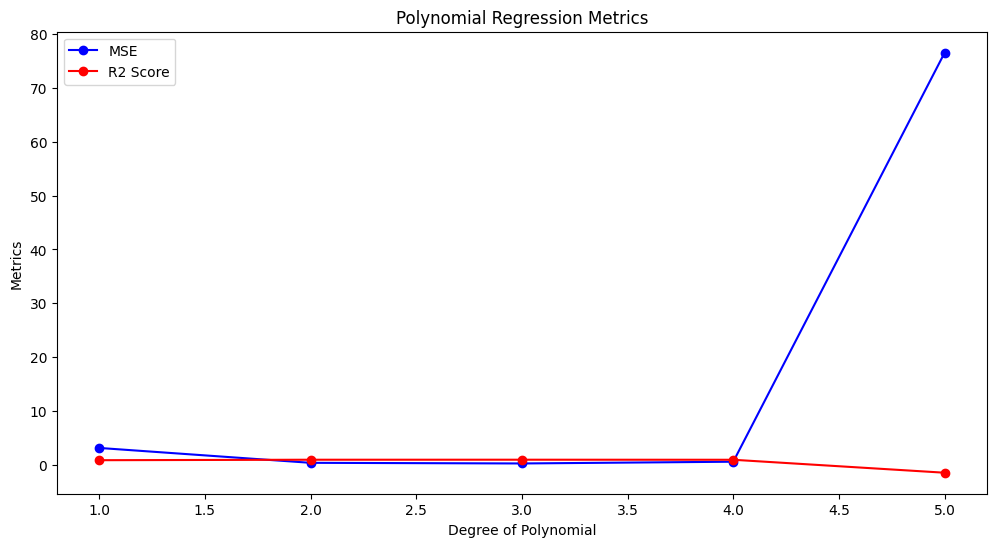

In [23]:
# plot the mse and r2 values for different degrees

plt.figure(figsize= (12, 6))
plt.plot( [1] + list(degrees), [mse_linear] + mse_list, marker = 'o', color = 'blue', label = 'MSE')
plt.plot( [1] + list(degrees), [r2_linear] + r2_list, marker = 'o', color = 'red', label = 'R2 Score')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Metrics')
plt.title('Polynomial Regression Metrics')
plt.legend()
plt.show()

In [24]:
# predict on actual data

poly = PolynomialFeatures(degree = 3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# actual value
new_adv_data = pd.DataFrame([[150, 25, 14]], columns= X_train.columns)
new_adv_data_poly = poly.transform(new_adv_data)

# predict
y_pred_poly = poly_model.predict(new_adv_data_poly)

In [25]:
y_pred_poly

array([15.25530706])